# Import Library and Dataset

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import files
from google.colab import files
uploaded = files.upload()

Saving Jakarta 2015 - 2022.csv to Jakarta 2015 - 2022.csv


# Load and preprocessing data

In [ ]:
data = pd.read_csv("Jakarta 2015 - 2022.csv", parse_dates=['datetime'])
data_original = data.copy()
train_datetime = pd.to_datetime(data['datetime'])
data = data.set_index("datetime")
data.head(10)

,total_visitor,total_accomodation
datetime,,
2014-01-01,193017,16332
2014-02-01,185851,17101
2014-03-01,204004,17438
2014-04-01,186373,17943
2014-05-01,190716,18123
2014-06-01,213950,18293
2014-07-01,173914,18592
2014-08-01,224492,18872
2014-09-01,179723,19102


In [ ]:
#remove null value
data.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

In [ ]:
data_training = data

In [ ]:
scaler = StandardScaler()
scaled_data= pd.DataFrame(scaler.fit_transform(data_training), columns=data_training.columns)

# Scenario 1 -80_train : 20_test

Dalam skenario ini nantinya data akan displit  sebanyak 80:20, dimana 80 baris data nantinya akan digunakan untuk melakukan prediksi total visitor di masa depan

In [ ]:
#Assigned variable for training and testing
X = scaled_data['total_accomodation'].values
Y = scaled_data['total_visitor'].values

In [ ]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search.fit(X_train, Y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past = 1
n_month_for_prediction=12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor = grid_search.best_estimator_
Y_pred = best_regressor.predict(X_test[-n_month_for_prediction:])

In [ ]:
# Print the error metrics
prediction = best_regressor.predict(X_train[-n_month_for_prediction:])
mse = mean_squared_error(Y_train[-n_month_for_prediction:], prediction)
fmape = np.mean(np.abs((mse) / prediction)) * 100
mape = f"{(fmape*100):.2f}%"
mae = np.mean(np.abs((mse) / prediction))

print("MSE:", mse)
print("MAPE:", mape)
print("MAE:", mae)



MSE: 0.11361666726690933
MAPE: 1465.78%
MAE: 0.14657756628295923


In [ ]:
Y_test = Y_test[-n_month_for_prediction:]

In [ ]:
Y_pred=Y_pred.reshape(-1,1)
prediction_copies = np.repeat(Y_pred, data_training.shape[1], axis=-1)
Y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
Y_test = np.repeat(Y_test, data_training.shape[1], axis=-1)
Y_test = scaler.inverse_transform(Y_test)[:,0]

<ipython-input-81-dcac8c06a416>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


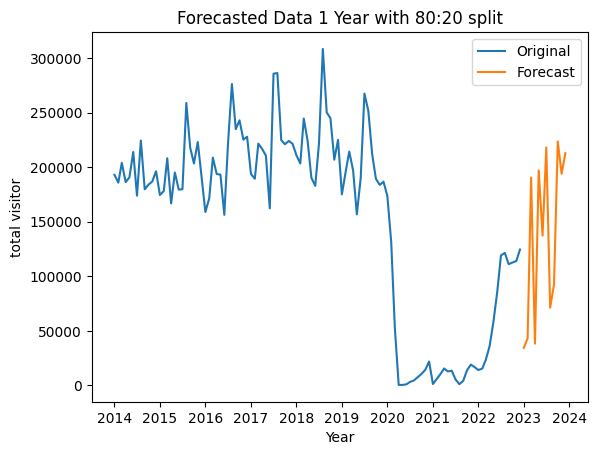

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': Y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Data 1 Year with 80:20 split')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates, Y_pred_future))

In [ ]:
# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates, Y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast SVR scenario 1")
print(table)

Hasil Forecast SVR scenario 1
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      34324.3 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      43183.7 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     190534   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      38317.2 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     197085   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     137257   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     218123   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      71237.5 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │      92630.6 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     223616   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     194003   │
├─────────────────────┼───────────

# Skenario 2 - 70_train : 30_test

Dalam skenario ini nantinya data akan displit  sebanyak 70:30, dimana 70 baris data nantinya akan digunakan untuk melakukan prediksi total visitor di masa depan

In [ ]:
#Assigned variable for training and testing
X2 = scaled_data['total_accomodation'].values
Y2 = scaled_data['total_visitor'].values

In [ ]:
X2=X2.reshape(-1,1)
Y2=Y2.reshape(-1,1)

In [ ]:
# Split the data into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.30, random_state = 42)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid2 = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search2 = GridSearchCV(estimator=SVR(), param_grid=param_grid2, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search2.fit(X_train2, Y_train2)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params2 = grid_search2.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past2 = 2
n_month_for_prediction2=12
predict_period_month2 = pd.date_range(list(train_datetime)[-n_past2], periods=n_month_for_prediction2, freq='M').tolist()
print(predict_period_month2)

[Timestamp('2022-11-30 00:00:00', freq='M'), Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor2 = grid_search2.best_estimator_
Y_pred2 = best_regressor2.predict(X_test2[-n_month_for_prediction2:])

In [ ]:
# Print the error metrics
prediction2 = best_regressor2.predict(X_train2[-n_month_for_prediction:])
mse2 = mean_squared_error(Y_train2[-n_month_for_prediction:], prediction2)
fmape2 = np.mean(np.abs((mse2) / prediction2)) * 100
mape2 = f"{(fmape2*100):.2f}%"
mae2 = np.mean(np.abs((mse2) / prediction2))

print("MSE:", mse2)
print("MAPE:", mape2)
print("MAE:", mae2)


MSE: 0.11410621750220085
MAPE: 1475.24%
MAE: 0.14752412656429045


In [ ]:
Y_test2 = Y_test2[-n_month_for_prediction:]

In [ ]:
Y_pred2=Y_pred2.reshape(-1,1)
prediction_copies2 = np.repeat(Y_pred2, data_training.shape[1], axis=-1)
Y_pred_future2 = scaler.inverse_transform(prediction_copies2)[:,0]

<ipython-input-95-ed6bc7c394fd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


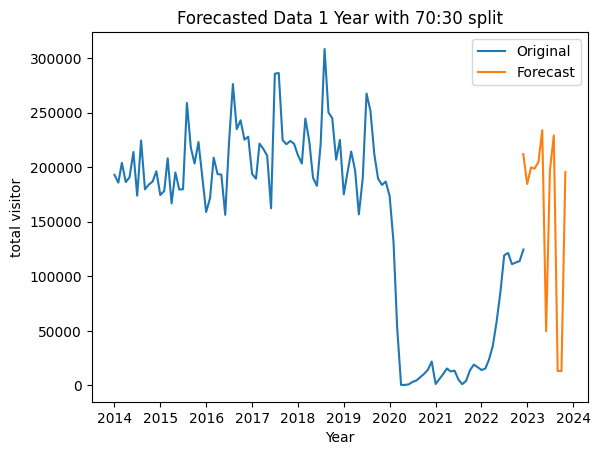

In [ ]:
forecast_dates2 = []

for time_i in predict_period_month2:
    forecast_dates2.append(time_i.date())

df_forecast2 = pd.DataFrame({'Date': forecast_dates2, 'total_visitor': Y_pred_future2})
df_forecast2['date'] = pd.to_datetime(df_forecast2['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'total_visitor' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

# Plotting with the correct DataFrame and column names
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast2, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Data 1 Year with 70:30 split')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates2, Y_pred_future2))

In [ ]:
# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates2, Y_pred_future2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast SVR scenario 2")
print(table2)

Hasil Forecast SVR scenario 2
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │     212040   │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     184623   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     199816   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     198685   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     204823   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     233955   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      49622.8 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     197083   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     229182   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      13201.5 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      13121.6 │
├─────────────────────┼───────────

# Skenario 3 - 60_train : 40_test

Dalam skenario ini nantinya data akan displit  sebanyak 60:40, dimana 60 baris data nantinya akan digunakan untuk melakukan prediksi total visitor di masa depan

In [ ]:
X3 = scaled_data['total_accomodation'].values
Y3 = scaled_data['total_visitor'].values

In [ ]:
X3=X3.reshape(-1,1)
Y3=Y3.reshape(-1,1)

In [ ]:
# Split the data into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size = 0.40, random_state = 42)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid3 = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search3 = GridSearchCV(estimator=SVR(), param_grid=param_grid3, refit=True, verbose=2, cv=2)

In [ ]:
# Fit model with the best parameters
grid_search3.fit(X_train3, Y_train3)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
# Get the best parameters
best_params3 = grid_search3.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
n_past3 = 2
n_month_for_prediction3=12
predict_period_month3 = pd.date_range(list(train_datetime)[-n_past3], periods=n_month_for_prediction3, freq='M').tolist()
print(predict_period_month3)

[Timestamp('2022-11-30 00:00:00', freq='M'), Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M')]


In [ ]:
# Make predictions with the best parameter
best_regressor3 = grid_search3.best_estimator_
Y_pred3 = best_regressor.predict(X_test3[-n_month_for_prediction3:])

In [ ]:
# Print the error metrics
prediction3 = best_regressor3.predict(X_train3[-n_month_for_prediction:])
mse3 = mean_squared_error(Y_train3[-n_month_for_prediction:], prediction2)
fmape3 = np.mean(np.abs((mse3) / prediction3)) * 100
mape3 = f"{(fmape3*100):.2f}%"
mae3 = np.mean(np.abs((mse3) / prediction3))

print("MSE:", mse3)
print("MAPE:", mape3)
print("MAE:", mae3)


MSE: 0.11410621750220085
MAPE: 1555.84%
MAE: 0.15558360723888745


In [ ]:
Y_test3 = Y_test3[-n_month_for_prediction:]

In [ ]:
Y_pred3=Y_pred3.reshape(-1,1)
prediction_copies3 = np.repeat(Y_pred3, data_training.shape[1], axis=-1)
Y_pred_future3 = scaler.inverse_transform(prediction_copies2)[:,0]

<ipython-input-109-2a9414551645>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


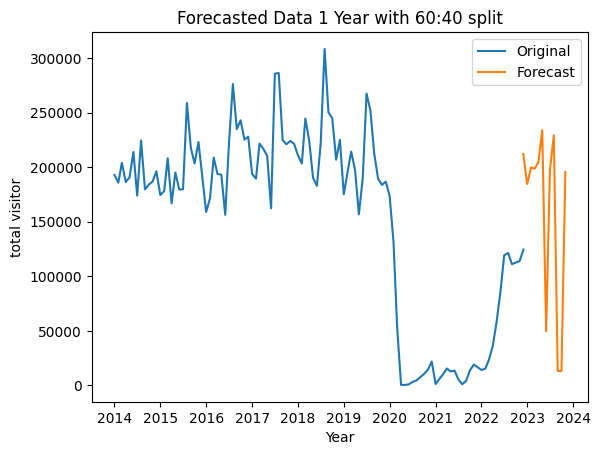

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected variable name
forecast_dates3 = []

for time_i in predict_period_month3:
    forecast_dates3.append(time_i.date())

df_forecast3 = pd.DataFrame({'Date': forecast_dates3, 'total_visitor': Y_pred_future3})
df_forecast3['date'] = pd.to_datetime(df_forecast3['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'total_visitor' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

# Plotting with the correct DataFrame and column names
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast3, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Data 1 Year with 60:40 split')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates3 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates3, Y_pred_future3))

In [ ]:
# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates3, Y_pred_future3))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast SVR scenario 3")
print(table3)

Hasil Forecast SVR scenario 3
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │     212040   │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     184623   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     199816   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     198685   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     204823   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     233955   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      49622.8 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     197083   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     229182   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      13201.5 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      13121.6 │
├─────────────────────┼───────────

# Comparison and conclusion

In [ ]:

# Define the data for each scenario
comparison_error = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'RNN',
        'MAPE': mape,
        'MAE': mae,
        'MSE': mse,
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'RNN',
        'MAPE': mape2,
        'MAE': mae2,
        'MSE': mse2,
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'RNN',
        'MAPE': mape3,
        'MAE': mae3,
        'MSE': mse3,
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(comparison_error)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)

╒════════════╤═════════╤══════════╤══════════╤══════════╕
│ Scenario   │ Model   │ MAPE     │      MAE │      MSE │
╞════════════╪═════════╪══════════╪══════════╪══════════╡
│ Scenario 1 │ RNN     │ 1465.78% │ 0.146578 │ 0.113617 │
├────────────┼─────────┼──────────┼──────────┼──────────┤
│ Scenario 2 │ RNN     │ 1475.24% │ 0.147524 │ 0.114106 │
├────────────┼─────────┼──────────┼──────────┼──────────┤
│ Scenario 3 │ RNN     │ 1555.84% │ 0.155584 │ 0.114106 │
╘════════════╧═════════╧══════════╧══════════╧══════════╛


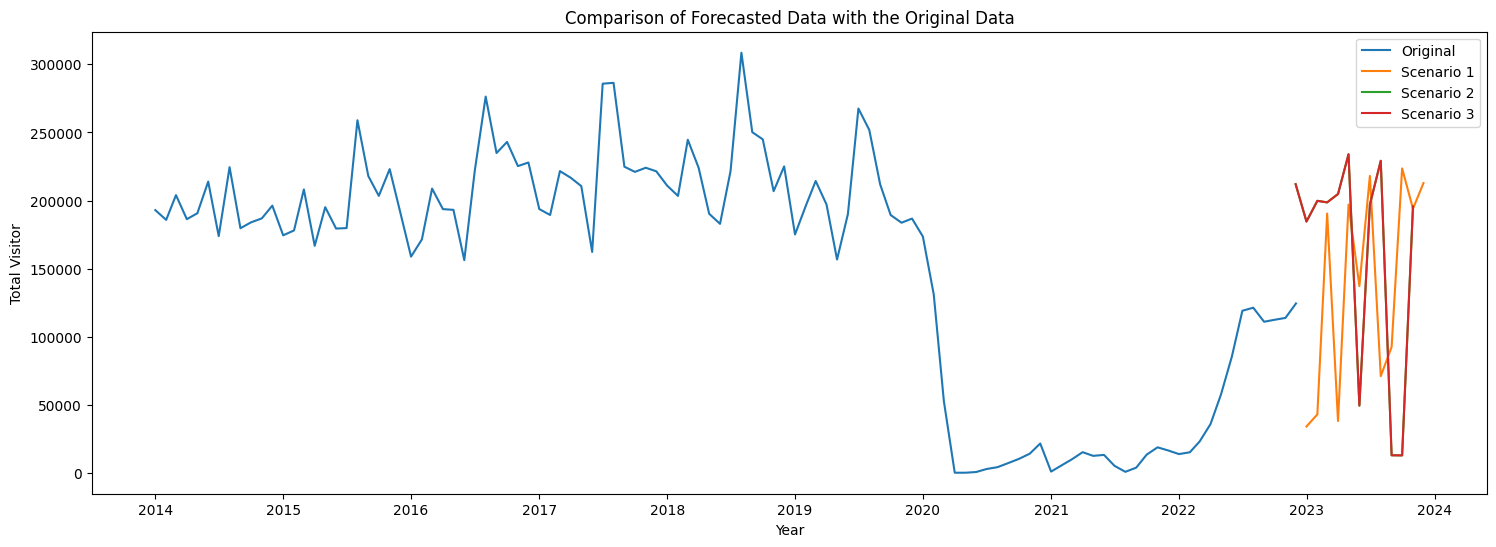

In [ ]:
# Plot the wider graph
plt.figure(figsize=(18, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Scenario 1')
sns.lineplot(data=df_forecast2, x='date', y='total_visitor', label='Scenario 2')
sns.lineplot(data=df_forecast3, x='date', y='total_visitor', label='Scenario 3')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Comparison of Forecasted Data with the Original Data')
plt.legend()
plt.show()
